# SWMAL Exercise

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.

All concepts in the figure must be explained

* training/generalization error,
* underfit/overfit zone,
* optimal capacity,
* generalization gab,
* and the two axes: x/capacity, y/error.

In [ ]:
# TODO: ...in text
assert False, "TODO: write some text.."

### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that is _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves").

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III).

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE$_1$: the generalization plot figure 5.3 in [DL] (above) and the plots below have different x-axis, and are not to be compared directly!

NOTE$_2$: notice that a 90 degree polynomial is used for the polynomial regression. This is just to produce a model with an extremly high capacity.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


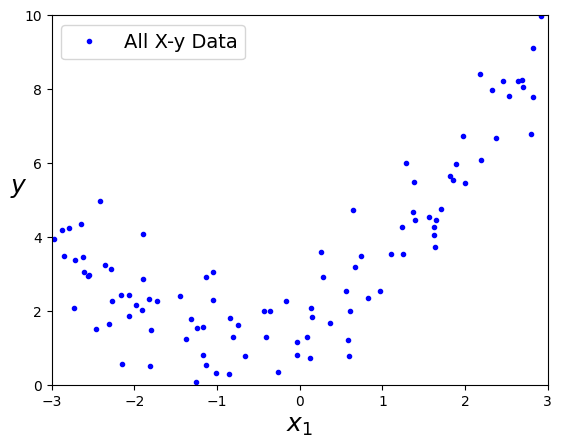

OK


In [3]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')

In [6]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)

    train_errors, val_errors = [], []

    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=0,
                           random_state=42)

    for epoch in range(n_epochs):

        sgd_reg.fit(X_train, y_train)

        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch=  72, mse_train=2.39, mse_val=3.46
  epoch=  73, mse_train=2.35, mse_val=3.41
  epoch=  74, mse_train=2.31, mse_val=3.37
  epoch=  75, mse_train=2.28, mse_val=3.32
  epoch=  76, mse_train=2.24, mse_val=3.28
  epoch=  77, mse_train=2.20, mse_val=3.24
  epoch=  78, mse_train=2.17, mse_val=3.20
  epoch=  79, mse_train=2.14, mse_val=3.15
  epoch=  80, mse_train=2.10, mse_val=3.12
  epoch=  81, mse_train=2.07, mse_val=3.08
  epoch=  82, mse_train=2.04, mse_val=3.04
  epoch=  83, mse_train=2.01, mse_val=3.00
  epoch=  84, mse_train=1.98, mse_val=2.96
  epoch=  85, mse_train=1.95, mse_val=2.93
  epoch=  86, mse_train=1.92, mse_val=2.89
  epoch=  87, mse_train=1.89, mse_val=2.86
  epoch=  88, mse_train=1.86, mse_val=2.82
  epoch=  89, mse_train=1.84, mse_val=2.79
  epoch=  90, mse_train=1.81, mse_val=2.76
  epoch=  91, mse_train=1.79, mse_val=2.73
  epoch=  92, mse_train=1.76, mse_val=2.70
  epoch=  93, mse_train=1.74, mse_val=2.67
  epoch=  94, mse_train=1.71, mse_val=2.64
  epoch=  9

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 148, mse_train=0.99, mse_val=1.68
  epoch= 149, mse_train=0.98, mse_val=1.67
  epoch= 150, mse_train=0.97, mse_val=1.67
  epoch= 151, mse_train=0.97, mse_val=1.66
  epoch= 152, mse_train=0.96, mse_val=1.65
  epoch= 153, mse_train=0.95, mse_val=1.64
  epoch= 154, mse_train=0.95, mse_val=1.63
  epoch= 155, mse_train=0.94, mse_val=1.62
  epoch= 156, mse_train=0.93, mse_val=1.61
  epoch= 157, mse_train=0.93, mse_val=1.61
  epoch= 158, mse_train=0.92, mse_val=1.60
  epoch= 159, mse_train=0.92, mse_val=1.59
  epoch= 160, mse_train=0.91, mse_val=1.58
  epoch= 161, mse_train=0.91, mse_val=1.58
  epoch= 162, mse_train=0.90, mse_val=1.57
  epoch= 163, mse_train=0.90, mse_val=1.56
  epoch= 16

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 198, mse_train=0.76, mse_val=1.40
  epoch= 199, mse_train=0.76, mse_val=1.40
  epoch= 200, mse_train=0.76, mse_val=1.40
  epoch= 201, mse_train=0.75, mse_val=1.39
  epoch= 202, mse_train=0.75, mse_val=1.39
  epoch= 203, mse_train=0.75, mse_val=1.39
  epoch= 204, mse_train=0.75, mse_val=1.39
  epoch= 205, mse_train=0.74, mse_val=1.39
  epoch= 206, mse_train=0.74, mse_val=1.38
  epoch= 207, mse_train=0.74, mse_val=1.38
  epoch= 208, mse_train=0.74, mse_val=1.38
  epoch= 209, mse_train=0.73, mse_val=1.38
  epoch= 210, mse_train=0.73, mse_val=1.38
  epoch= 211, mse_train=0.73, mse_val=1.37
  epoch= 212, mse_train=0.73, mse_val=1.37
  epoch= 213, mse_train=0.73, mse_val=1.37
  epoch= 214, mse_train=0.72, mse_val=1.37
  epoch= 215, mse_train=0.72, mse_val=1.37
  epoch= 216, mse_train=0.72, mse_val=1.37
  epoch= 217, mse_train=0.72, mse_val=1.36
  epoch= 218, mse_train=0.72, mse_val=1.36
  epoch= 219, mse_train=0.71, mse_val=1.36
  epoch= 220, mse_train=0.71, mse_val=1.36
  epoch= 22

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 259, mse_train=0.65, mse_val=1.36
  epoch= 260, mse_train=0.65, mse_val=1.36
  epoch= 261, mse_train=0.65, mse_val=1.36
  epoch= 262, mse_train=0.65, mse_val=1.36
  epoch= 263, mse_train=0.65, mse_val=1.36
  epoch= 264, mse_train=0.65, mse_val=1.36
  epoch= 265, mse_train=0.65, mse_val=1.37
  epoch= 266, mse_train=0.65, mse_val=1.37
  epoch= 267, mse_train=0.64, mse_val=1.37
  epoch= 268, mse_train=0.64, mse_val=1.37
  epoch= 269, mse_train=0.64, mse_val=1.37
  epoch= 270, mse_train=0.64, mse_val=1.37
  epoch= 271, mse_train=0.64, mse_val=1.37
  epoch= 272, mse_train=0.64, mse_val=1.37
  epoch= 273, mse_train=0.64, mse_val=1.37
  epoch= 274, mse_train=0.64, mse_val=1.38
  epoch= 275, mse_train=0.64, mse_val=1.38
  epoch= 276, mse_train=0.64, mse_val=1.38
  epoch= 277, mse_train=0.63, mse_val=1.38
  epoch= 278, mse_train=0.63, mse_val=1.38
  epoch= 279, mse_train=0.63, mse_val=1.38
  epoch= 28

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 317, mse_train=0.60, mse_val=1.46
  epoch= 318, mse_train=0.60, mse_val=1.46
  epoch= 319, mse_train=0.60, mse_val=1.46
  epoch= 320, mse_train=0.60, mse_val=1.46
  epoch= 321, mse_train=0.60, mse_val=1.47
  epoch= 322, mse_train=0.60, mse_val=1.47
  epoch= 323, mse_train=0.60, mse_val=1.47
  epoch= 324, mse_train=0.60, mse_val=1.47
  epoch= 325, mse_train=0.60, mse_val=1.48
  epoch= 326, mse_train=0.60, mse_val=1.48
  epoch= 327, mse_train=0.60, mse_val=1.48
  epoch= 328, mse_train=0.60, mse_val=1.48
  epoch= 329, mse_train=0.60, mse_val=1.49
  epoch= 330, mse_train=0.59, mse_val=1.49
  epoch= 331, mse_train=0.59, mse_val=1.49
  epoch= 332, mse_train=0.59, mse_val=1.49
  epoch= 333, mse_train=0.59, mse_val=1.50
  epoch= 334, mse_train=0.59, mse_val=1.50
  epoch= 335, mse_train=0.59, mse_val=1.50
  epoch= 336, mse_train=0.59, mse_val=1.50
  epoch= 337, mse_train=0.59, mse_val=1.51
  epoch= 338, mse_train=0.59, mse_val=1.51
  epoch= 339, mse_train=0.59, mse_val=1.51
  epoch= 34

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 373, mse_train=0.57, mse_val=1.61
  epoch= 374, mse_train=0.57, mse_val=1.61
  epoch= 375, mse_train=0.57, mse_val=1.61
  epoch= 376, mse_train=0.57, mse_val=1.61
  epoch= 377, mse_train=0.57, mse_val=1.62
  epoch= 378, mse_train=0.57, mse_val=1.62
  epoch= 379, mse_train=0.57, mse_val=1.62
  epoch= 380, mse_train=0.57, mse_val=1.63
  epoch= 381, mse_train=0.57, mse_val=1.63
  epoch= 382, mse_train=0.57, mse_val=1.63
  epoch= 383, mse_train=0.57, mse_val=1.64
  epoch= 384, mse_train=0.57, mse_val=1.64
  epoch= 385, mse_train=0.57, mse_val=1.64
  epoch= 386, mse_train=0.57, mse_val=1.64
  epoch= 387, mse_train=0.57, mse_val=1.65
  epoch= 388, mse_train=0.57, mse_val=1.65
  epoch= 389, mse_train=0.57, mse_val=1.65
  epoch= 390, mse_train=0.57, mse_val=1.66
  epoch= 391, mse_train=0.57, mse_val=1.66
  epoch= 392, mse_train=0.57, mse_val=1.66
  epoch= 393, mse_train=0.57, mse_val=1.67
  epoch= 394, mse_train=0.57, mse_val=1.67
  epoch= 395, mse_train=0.56, mse_val=1.67
  epoch= 39

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha


  epoch= 428, mse_train=0.55, mse_val=1.77
  epoch= 429, mse_train=0.55, mse_val=1.78
  epoch= 430, mse_train=0.55, mse_val=1.78
  epoch= 431, mse_train=0.55, mse_val=1.78
  epoch= 432, mse_train=0.55, mse_val=1.78
  epoch= 433, mse_train=0.55, mse_val=1.79
  epoch= 434, mse_train=0.55, mse_val=1.79
  epoch= 435, mse_train=0.55, mse_val=1.79
  epoch= 436, mse_train=0.55, mse_val=1.80
  epoch= 437, mse_train=0.55, mse_val=1.80
  epoch= 438, mse_train=0.55, mse_val=1.80
  epoch= 439, mse_train=0.55, mse_val=1.81
  epoch= 440, mse_train=0.55, mse_val=1.81
  epoch= 441, mse_train=0.55, mse_val=1.81
  epoch= 442, mse_train=0.55, mse_val=1.82
  epoch= 443, mse_train=0.55, mse_val=1.82
  epoch= 444, mse_train=0.55, mse_val=1.82
  epoch= 445, mse_train=0.55, mse_val=1.82
  epoch= 446, mse_train=0.55, mse_val=1.83
  epoch= 447, mse_train=0.55, mse_val=1.83
  epoch= 448, mse_train=0.55, mse_val=1.83
  epoch= 449, mse_train=0.55, mse_val=1.84
  epoch= 450, mse_train=0.55, mse_val=1.84
  epoch= 4

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 486, mse_train=0.54, mse_val=1.95
  epoch= 487, mse_train=0.54, mse_val=1.95
  epoch= 488, mse_train=0.54, mse_val=1.95
  epoch= 489, mse_train=0.54, mse_val=1.96
  epoch= 490, mse_train=0.54, mse_val=1.96
  epoch= 491, mse_train=0.54, mse_val=1.96
  epoch= 492, mse_train=0.54, mse_val=1.97
  epoch= 493, mse_train=0.54, mse_val=1.97
  epoch= 494, mse_train=0.54, mse_val=1.97
  epoch= 495, mse_train=0.54, mse_val=1.97
  epoch= 496, mse_train=0.54, mse_val=1.98
  epoch= 497, mse_train=0.54, mse_val=1.98
  epoch= 498, mse_train=0.54, mse_val=1.98
  epoch= 499, mse_train=0.54, mse_val=1.99
OK


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

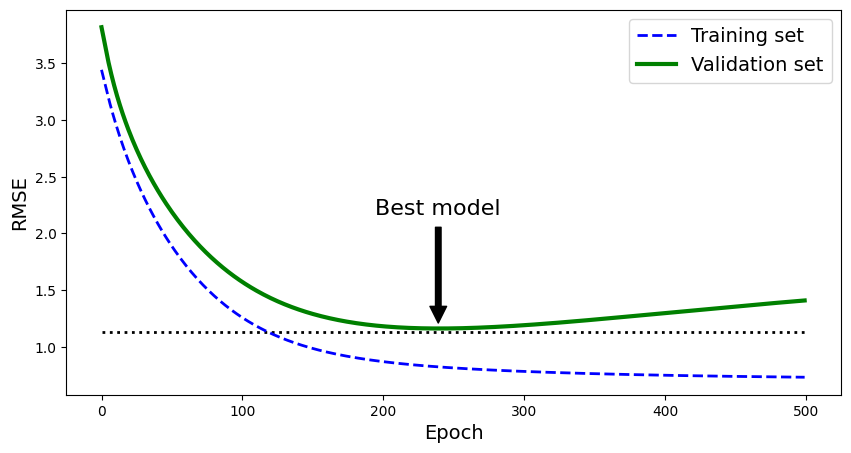

OK


In [7]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: code review..
assert False, "TODO: code review in text form"

### Qc)  Early Stopping

How would you implement ___early stopping___, in the code above?

Write an explanation of the early stopping concept...that is, just write some pseudo code that 'implements' the early stopping.

OPTIONAL: also implement your early stopping pseudo code in Python, and get it to work with the code above (and not just flipping the hyperparameter to `early_stopping=True` on the `SGDRegressor`).

In [ ]:
# TODO: early stopping..
assert False, "TODO: explain early stopping"

### Qd) Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below (code similar to what we saw in `capacity_under_overfitting.ipynb`), and explain the generated RMSE-Capacity plot. Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.

Iterating...degrees= range(1, 10)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44
  degree=   8, rmse_training=0.10, rmse_cv=0.60
  degree=   9, rmse_training=0.10, rmse_cv=4.61


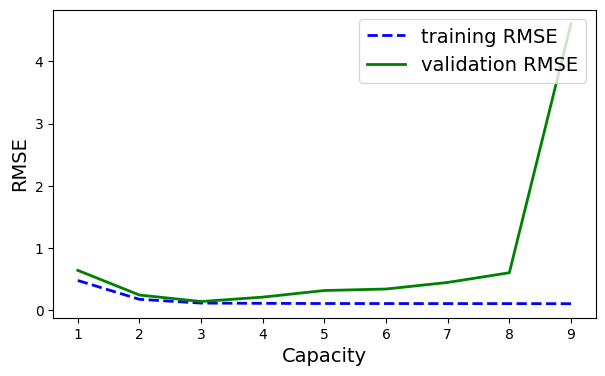

OK


In [13]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,10)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]

    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)

    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])

    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)

    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()

    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)

    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")

    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)

plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: investigate..
assert False, "TODO: ...answer in text form"

In [10]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False, tolerance=10):
    print("Training...n_epochs=",n_epochs)

    train_errors, val_errors = [], []

    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=0,
                           random_state=42)
    best_val_error = float('inf')
    best_model = None
    patience = tolerance

    for epoch in range(n_epochs):

        sgd_reg.fit(X_train, y_train)

        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if mse_val < best_val_error:
            best_val_error = mse_val
            best_model = sgd_reg
            patience = tolerance
        else:
            patience -= 1
            if patience == 0:
                print(f"Stopping early at epoch {epoch}")
                break
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch=  66, mse_train=2.65, mse_val=3.76
  epoch=  67, mse_train=2.60, mse_val=3.71
  epoch=  68, mse_train=2.56, mse_val=3.66
  epoch=  69, mse_train=2.52, mse_val=3.60
  epoch=  70, mse_train=2.47, mse_val=3.56
  epoch=  71, mse_train=2.43, mse_val=3.51
  epoch=  72, mse_train=2.39, mse_val=3.46
  epoch=  73, mse_train=2.35, mse_val=3.41
  epoch=  74, mse_train=2.31, mse_val=3.37
  epoch=  75, mse_train=2.28, mse_val=3.32
  epoch=  76, mse_train=2.24, mse_val=3.28
  epoch=  77, mse_train=2.20, mse_val=3.24
  epoch=  78, mse_train=2.17, mse_val=3.20
  epoch=  79, mse_train=2.14, mse_val=3.15
  epoch=  80, mse_train=2.10, mse_val=3.12
  epoch=  81, mse_train=2.07, mse_val=3.08
  epoch=  82, mse_train=2.04, mse_val=3.04
  epoch=  83, mse_train=2.01, mse_val=3.00
  epoch=  84, mse_train=1.98, mse_val=2.96
  epoch=  85, mse_train=1.95, mse_val=2.93
  epoch=  86, mse_train=1.92, mse_val=2.89
  epoch=  87, mse_train=1.89, mse_val=2.86
  epoch=  88, mse_train=1.86, mse_val=2.82
  epoch=  8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 148, mse_train=0.99, mse_val=1.68
  epoch= 149, mse_train=0.98, mse_val=1.67
  epoch= 150, mse_train=0.97, mse_val=1.67
  epoch= 151, mse_train=0.97, mse_val=1.66
  epoch= 152, mse_train=0.96, mse_val=1.65
  epoch= 153, mse_train=0.95, mse_val=1.64
  epoch= 154, mse_train=0.95, mse_val=1.63
  epoch= 155, mse_train=0.94, mse_val=1.62
  epoch= 156, mse_train=0.93, mse_val=1.61
  epoch= 157, mse_train=0.93, mse_val=1.61
  epoch= 15

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

  epoch= 200, mse_train=0.76, mse_val=1.40
  epoch= 201, mse_train=0.75, mse_val=1.39
  epoch= 202, mse_train=0.75, mse_val=1.39
  epoch= 203, mse_train=0.75, mse_val=1.39
  epoch= 204, mse_train=0.75, mse_val=1.39
  epoch= 205, mse_train=0.74, mse_val=1.39
  epoch= 206, mse_train=0.74, mse_val=1.38
  epoch= 207, mse_train=0.74, mse_val=1.38
  epoch= 208, mse_train=0.74, mse_val=1.38
  epoch= 209, mse_train=0.73, mse_val=1.38
  epoch= 210, mse_train=0.73, mse_val=1.38
  epoch= 211, mse_train=0.73, mse_val=1.37
  epoch= 212, mse_train=0.73, mse_val=1.37
  epoch= 213, mse_train=0.73, mse_val=1.37
  epoch= 214, mse_train=0.72, mse_val=1.37
  epoch= 215, mse_train=0.72, mse_val=1.37
  epoch= 216, mse_train=0.72, mse_val=1.37
  epoch= 217, mse_train=0.72, mse_val=1.36
  epoch= 218, mse_train=0.72, mse_val=1.36
  epoch= 219, mse_train=0.71, mse_val=1.36
  epoch= 220, mse_train=0.71, mse_val=1.36
  epoch= 221, mse_train=0.71, mse_val=1.36
  epoch= 222, mse_train=0.71, mse_val=1.36
  epoch= 22

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added comment on 90 degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot.
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.